# Variaciones del mismo digito

### En este notebook se observan distintas reconstrucciones del mismo dígito 

#### Datos

In [ ]:
from Datos.Data_acq import get_mnist_data
#import Data_acq as data
import matplotlib.pyplot as plt
import importlib

In [3]:
import importlib
#importlib.reload(data)
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = get_mnist_data()


Usando mnist como dataset


#### Modelo

In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"..")))
from models.cVAE import CVAE

from tensorflow.keras.models import load_model
from custom_layers.Sampling import  Sampling

modelo = load_model("../modelos_entreados/int_128_lat_2_mnist.keras",  custom_objects={"CVAE": CVAE, "Sampling": Sampling})


TypeError: <class 'models.cVAE.CVAE'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'models.cVAE', 'class_name': 'CVAE', 'config': {'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}}, 'registered_name': 'CVAE', 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': None, 'loss_weights': None, 'metrics': None, 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': False}}.

Exception encountered: Unable to revive model from config. When overriding the `get_config()` method, make sure that the returned config contains all items used as arguments in the  constructor to <class 'models.cVAE.CVAE'>, which is the default behavior. You can override this default behavior by defining a `from_config(cls, config)` class method to specify how to create an instance of CVAE from its config.

Received config={'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}}

Error encountered during deserialization: CVAE.__init__() got an unexpected keyword argument 'trainable'

### Más entrenamiento

Visualizaciones: 

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


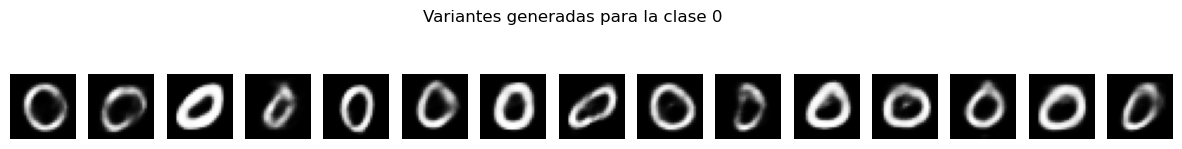

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


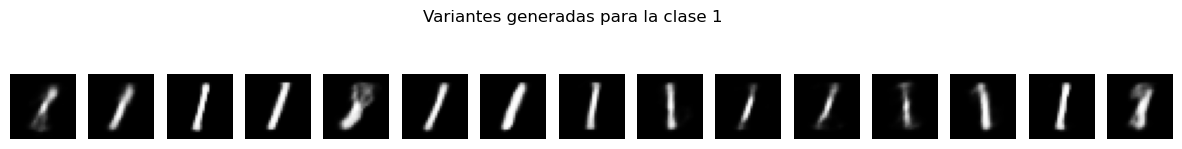

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


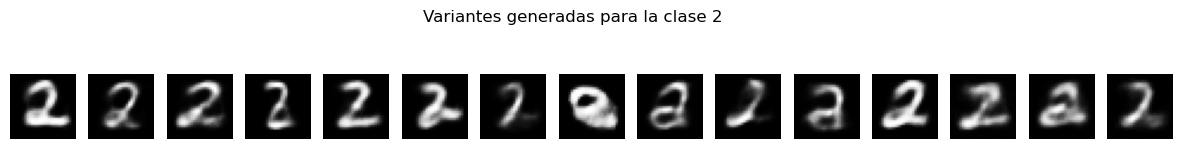

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


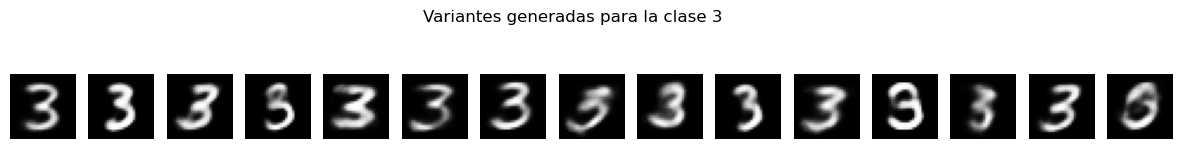

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


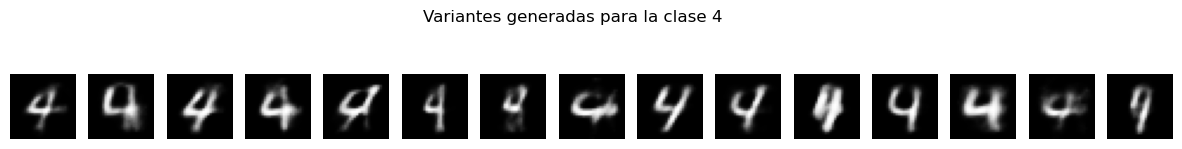

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


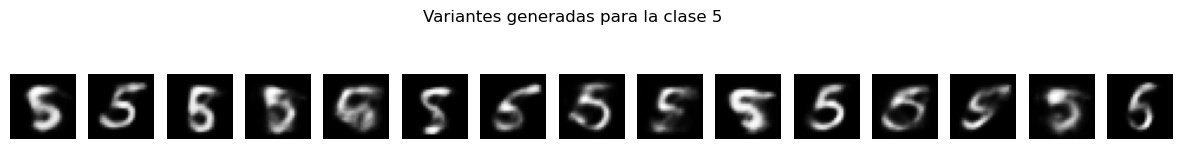

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


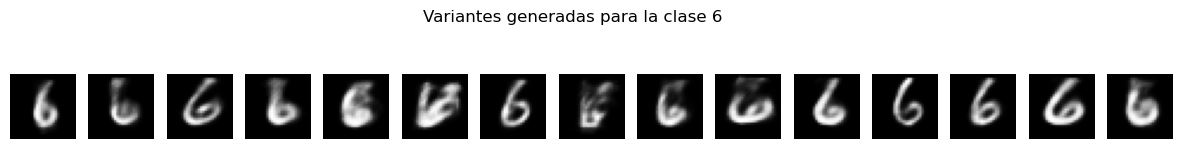

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


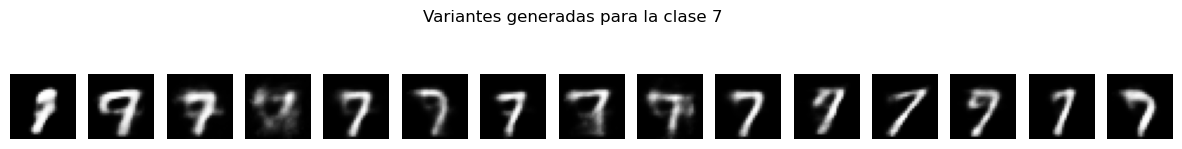

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


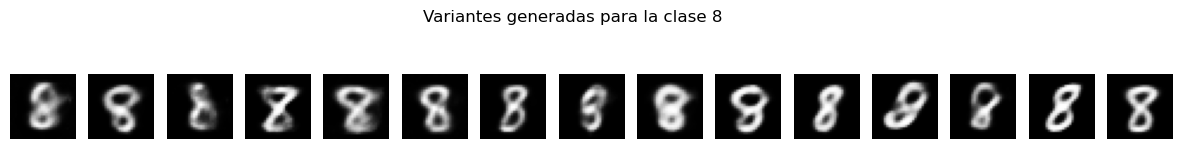

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


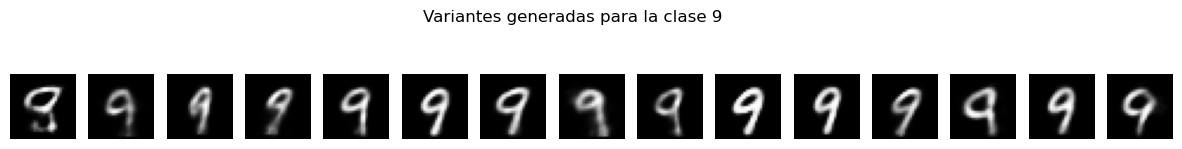

In [6]:
import visualizaciones.visualizar as vis
for i in range(10):
    vis.variantes(cvae,condicion_id=i,num_variantes=15)

latent_dim:  128 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


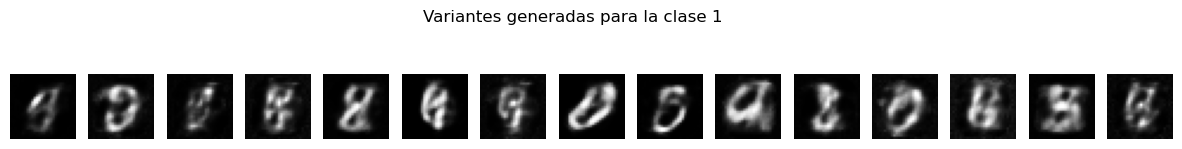

In [ ]:
import visualizaciones.visualizar as vis
import importlib
importlib.reload(vis)

custom_condition = np.zeros(shape=(15,10))
custom_condition = np.random.uniform(0,1,size=(15,10))

vis.variantes(cvae=cvae,condicion_id=1,num_variantes=15,custom_condition = custom_condition)

Metricas

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from collections import defaultdict

def evaluar_reconstruccion_por_clase(cvae, x_test, y_test, metric='mse'):
    """
    Evalúa la calidad de reconstrucción para cada clase.
    
    Args:
        cvae: modelo CVAE entrenado
        x_test: imágenes de prueba (shape: [N, 28, 28])
        y_test: etiquetas one-hot (shape: [N, 10])
        metric: 'mse' o 'bce'
    
    Returns:
        dict: promedio del error por clase
    """
    errores = defaultdict(list)

    for i in tqdm(range(len(x_test))):
        x = x_test[i:i+1]               # (1, 28, 28)
        y = y_test[i:i+1]               # (1, 10)

        # Codificar
        z_mean, _, z = cvae.encoder.predict([x, y],verbose=0)
        # Decodificar
        x_recon = cvae.decoder.predict([z, y],verbose=0)

        # Flatten para comparar
        x_flat = x.flatten()
        x_recon_flat = x_recon.flatten()

        if metric == 'mse':
            error = mean_squared_error(x_flat, x_recon_flat)
        elif metric == 'bce':
            import tensorflow.keras.losses as losses
            error = losses.binary_crossentropy(x_flat, x_recon_flat).numpy().mean();

        clase = np.argmax(y)
        errores[clase].append(error)

    # Promedio por clase
    resultados = {clase: np.mean(errores[clase]) for clase in errores}
    return resultados


In [1]:
from tensorflow.keras.models import load_model

modelo = load_model(
    "modelos/mi_modelo.keras",
    custom_objects={"Sampling": Sampling}
)


resultados = evaluar_reconstruccion_por_clase(cvae, x_test[0:1000], y_test[0:1000], metric='mse')

for clase, error in sorted(resultados.items()):
    print(f"Dígito {clase}: error promedio = {error:.4f}")



NameError: name 'Sampling' is not defined

100%|██████████| 1000/1000 [02:37<00:00,  6.36it/s]Dígito 0: error promedio = 0.0234
Dígito 1: error promedio = 0.0099
Dígito 2: error promedio = 0.0305
Dígito 3: error promedio = 0.0283
Dígito 4: error promedio = 0.0257
Dígito 5: error promedio = 0.0296
Dígito 6: error promedio = 0.0254
Dígito 7: error promedio = 0.0228
Dígito 8: error promedio = 0.0330
Dígito 9: error promedio = 0.0207

In [10]:
import matplotlib.pyplot as plt

# Tus datos
valores = list(resultados.values())
claves = list(resultados.keys())

# Graficar barras
bars = plt.bar(claves, valores)

# Etiquetas encima de cada barra
for i, bar in enumerate(bars):
    altura = bar.get_height()
    color_fondo = bar.get_facecolor()
    
    # Elegir blanco o negro según luminosidad del color de la barra
    r, g, b, _ = color_fondo
    color_texto = 'black'
    
    plt.text(
        bar.get_x() + bar.get_width()/2,   # centrado horizontal
        altura + 0.006,                    # un poco abajo del tope de la barra
        f"{valores[i]:.3f}",
        ha='center', va='top',
        color=color_texto, fontsize=10
    )

plt.xlabel("Dígito")
plt.ylabel("Error de reconstrucción [MSE]")
plt.title("Reconstrucción promedio por clase")
plt.tight_layout()
plt.show()
plt.savefig("MSE_128_variaciones.png", dpi=300, bbox_inches='tight')



NameError: name 'resultados' is not defined

In [ ]:
import contextlib
import io

resultados = evaluar_reconstruccion_por_clase(cvae, x_test[0:1000], y_test[0:1000], metric='bce');

for clase, error in sorted(resultados.items()):
    print(f"Dígito {clase}: error promedio = {error:.4f}")



100%|██████████| 1000/1000 [02:48<00:00,  5.93it/s]

Dígito 0: error promedio = 0.1466
Dígito 1: error promedio = 0.0644
Dígito 2: error promedio = 0.1646
Dígito 3: error promedio = 0.1512
Dígito 4: error promedio = 0.1359
Dígito 5: error promedio = 0.1588
Dígito 6: error promedio = 0.1407
Dígito 7: error promedio = 0.1253
Dígito 8: error promedio = 0.1664
Dígito 9: error promedio = 0.1267


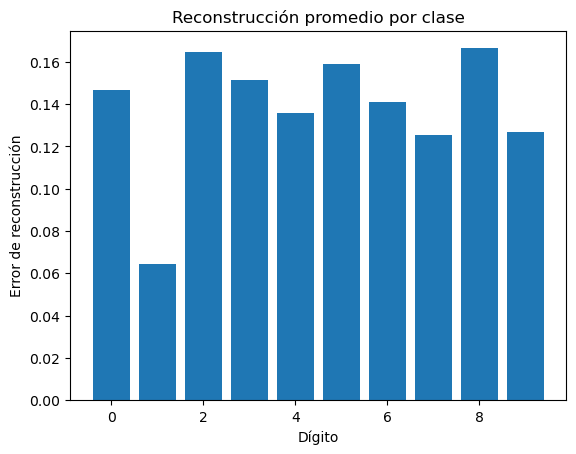

In [ ]:

import matplotlib.pyplot as plt

plt.bar(resultados.keys(), resultados.values())
plt.xlabel("Dígito")
plt.ylabel("Error de reconstrucción")
plt.title("Reconstrucción promedio por clase")
plt.show()
plt.savefig()

## Parametros 
Todas las imagenes se generan con los siguietnes parametros:
- Espacio latente: 128
- Dimension intermedia: 256
- 20 epocas de entrenamiento
- 1000 imagnes para calcular las métricas


Con ambas metricas el digito con menor error resulta ser el número 1, el resto de los valores parecen ser más uniformes. Por el contrario, el de mayor error ese el numero 8. Esto probablemente tenga que ver con la estructura de los números lineas (simple) contra curvas(más compleja). Los errores parecen seguir esta tendencia de más recto a más curvo.  Error cuadratcio medio: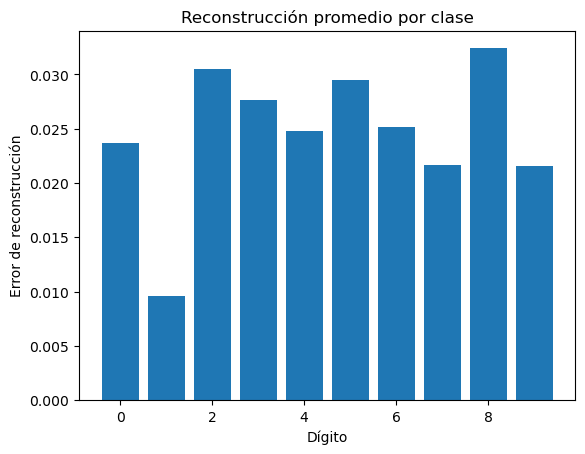


Cross Binary Entropy:  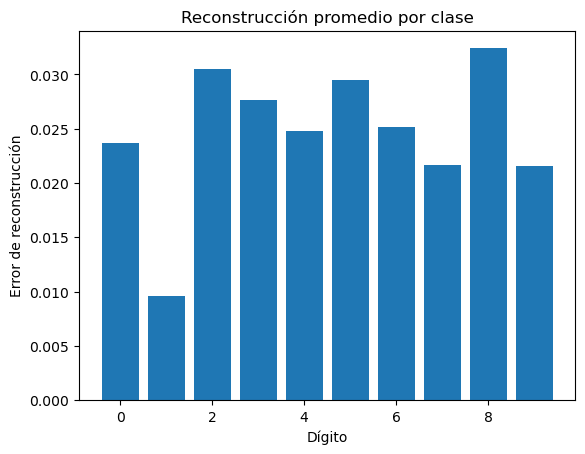

## Parametros 
Todas las imagenes se generan con los siguietnes parametros:
- Espacio latente: 256
- Dimension intermedia: 512
- 20 epocas de entrenamiento
- 1000 imagnes para calcular las métricas

Con ambas metricas el digito con menor error resulta ser el número 1, el resto de los valores parecen ser más uniformes. 
Por el contrario, el de mayor error ese el numero 8. 
Esto probablemente tenga que ver con la estructura de los números lineas (simple) contra curvas(más compleja). 
Los errores parecen seguir esta tendencia de más recto a más curvo.  
Error cuadratcio medio:![image.png](attachment:image.png)


Cross Binary Entropy:  ![image.png](attachment:image.png)